# CC10 Analog Electronics Practicals

## V-I Characteristics of a PN Junction Diode

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import curve_fit
import sympy as smp
import pandas as pd
import seaborn as sns

**Experiment 1 (31/03/2023):** 

*Forward Bias data:*

In [2]:
x_data1 = np.array([0, 0.08, 0.13, 0.2, 0.27, 0.34, 0.38, 0.39, 0.42, 0.45, 0.46, 0.48,
0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62]) 
y_data1 = np.array([0, 0, 0, 0, 0, 0.01, 0.02, 0.04, 0.09, 0.19, 0.3, 0.49, 0.6, 0.76, 
1.04, 1.3, 1.86, 2.4, 2.96, 4.22, 5.36, 6.55, 8.06, 10.54, 13.34, 16.56])

*Reverse Bias data:*

*Reverse Bias data (modified):*

In [3]:
x_data2 = np.array([0, -0.2, -0.3, -0.8, -1, -1.7, -2.52, -3, -3.5, -4])
y_data2 = np.array([0, 0, 0, 0, 0, -0.01, -0.01, -0.01, -0.02, -0.02])

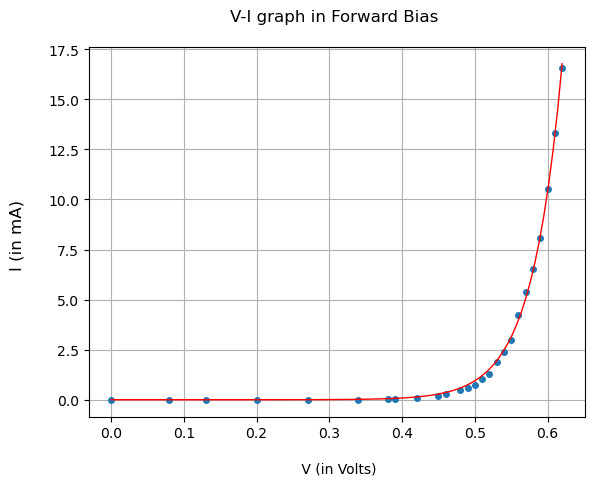


 Equation of the current (in forward bias) is, 
 
 I =

5.9732163634605e-6*exp(23.9488066129191*V_F)

Reverse Saturation current is 5.973216363460505e-06 mA.


In [4]:
def f1(x, a, b):
    return a*np.exp(b*x)

popt1, pcov1 = curve_fit(f1, x_data1, y_data1, p0=[0.01,1])
ap, bp = popt1
x1 = np.linspace(min(x_data1), max(x_data1), 100)
y1 = f1(x1, ap, bp)

plt.plot(x_data1,y_data1, 'o', ms=4)
plt.plot(x1,y1, color='r', lw=1)
plt.title('V-I graph in Forward Bias \n')
plt.xlabel('\n V (in Volts)')
plt.ylabel('I (in mA) \n', fontsize=12)
plt.grid()
plt.savefig('v-i characteristics of pn junction diode in forward bias', dpi=200)
plt.show()

VF, I = smp.symbols('V_F I', real=True)
I = ap*smp.exp(bp*VF)
print('\n Equation of the current (in forward bias) is, \n \n I =', end='')
display(I)
print('Reverse Saturation current is', ap, 'mA.')

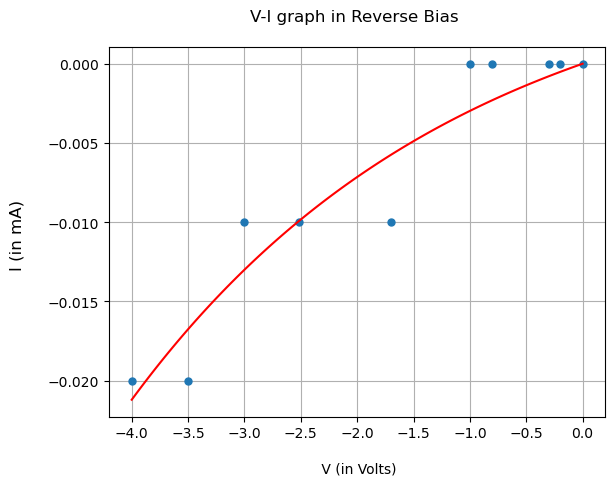


 Equation of the current (in reverse bias) is, 
 
 I =

0.00740336214610216 - 0.00740336214610216*exp(-0.337886819414089*V_R)

In [5]:
def f2(x,p,q):
    return p*(1 - np.exp(q*x))

popt2, pcov2 = curve_fit(f2, x_data2, y_data2, p0=[0.02,0.001])
pp, qp = popt2
x2 = np.linspace(min(x_data2), max(x_data2), 100)
y2 = f2(x2, pp, qp)

plt.plot(x_data2,y_data2, 'o', ms=5)
plt.plot(x2,y2, color='r')
plt.title('V-I graph in Reverse Bias \n')
plt.xlabel('\n V (in Volts)')
plt.ylabel('I (in mA) \n', fontsize=12)
plt.grid()
plt.show()

VR, I = smp.symbols('V_R I', real=True)
I = pp*(1 - smp.exp(qp*VR))
print('\n Equation of the current (in reverse bias) is, \n \n I =', end='')
display(I)

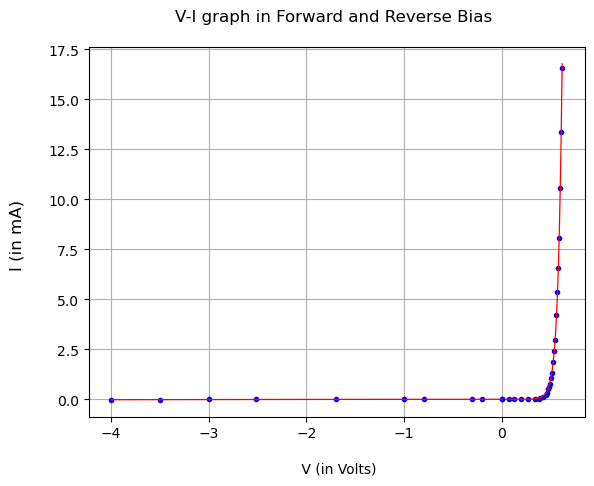


 Equation of the current (in forward bias) is, 
 
 I =

5.9732163634605e-6*exp(23.9488066129191*V_F)

Reverse Saturation current is 5.973216363460505e-06 mA.

 Equation of the current (in reverse bias) is, 
 
 I =

0.00740328976691683 - 0.00740328976691683*exp(-0.337888765383946*V_R)

In [6]:
def f1(x, a, b):
    return a*np.exp(b*x)

popt1, pcov1 = curve_fit(f1, x_data1, y_data1, p0=[0.01,1])
ap, bp = popt1
x1 = np.linspace(min(x_data1), max(x_data1), 100)
y1 = f1(x1, ap, bp)

def f2(x,p,q):
    return p*(1 - np.exp(-q*x))

popt2, pcov2 = curve_fit(f2, x_data2, y_data2, p0=[0.02,1])
pp, qp = popt2
x2 = np.linspace(min(x_data2), max(x_data2), 100)
y2 = f2(x2, pp, qp)

plt.plot(x_data1,y_data1, 'o', color='blue', ms=3)
plt.plot(x1,y1, color='r', lw=0.9)
plt.plot(x_data2,y_data2, 'o', color='blue', ms=3)
plt.plot(x2,y2, color='r', lw=0.9)
plt.title('V-I graph in Forward and Reverse Bias \n')
plt.xlabel('\n V (in Volts)')
plt.ylabel('I (in mA) \n', fontsize=12)
plt.grid()
plt.show()

VF, I = smp.symbols('V_F I', real=True)
I = ap*smp.exp(bp*VF)
print('\n Equation of the current (in forward bias) is, \n \n I =', end='')
display(I)
print('Reverse Saturation current is', ap, 'mA.')

VR, I = smp.symbols('V_R I', real=True)
I = pp*(1 - smp.exp(-qp*VR))
print('\n Equation of the current (in reverse bias) is, \n \n I =', end='')
display(I)

## V-I Characteristics of Green LED

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import sympy as smp
from sympy import *

x_data = np.array([0,
0.03,
0.07,
0.12,
0.2,
0.3,
0.4,
0.54,
0.76,
0.9,
1.03,
1.16,
1.26,
1.36,
1.5,
1.64,
1.75,
1.88,
1.95,
1.99,
2.02,
2.04,
2.07])

y_data = np.array([0,
0.12,
0.24,
0.4,
0.62,
0.96,
1.27,
1.72,
2.4,
2.82,
3.25,
3.66,
3.96,
4.4,
4.72,
5.21,
5.74,
7.33,
9,
11.06,
13.06,
15.34,
19.51])

In [8]:
x_data0 = np.array([0, 0.03, 0.07, 0.12, 0.2, 0.3, 0.4, 0.54,
0.76, 0.9, 1.03, 1.16, 1.26, 1.36, 1.5, 1.64, 1.75])
y_data0 = np.array([0, 0.12, 0.24, 0.4, 0.62, 0.96, 1.27,
1.72, 2.4, 2.82, 3.25, 3.66, 3.96, 4.4, 4.72, 5.21, 5.74])

# LED starts glowing at 1.99 volts.

x_data = np.array([1.75, 1.88, 1.95, 1.99, 2.02, 2.04, 2.07])
y_data = np.array([5.74, 7.33, 9, 11.06, 13.06, 15.34, 19.51])

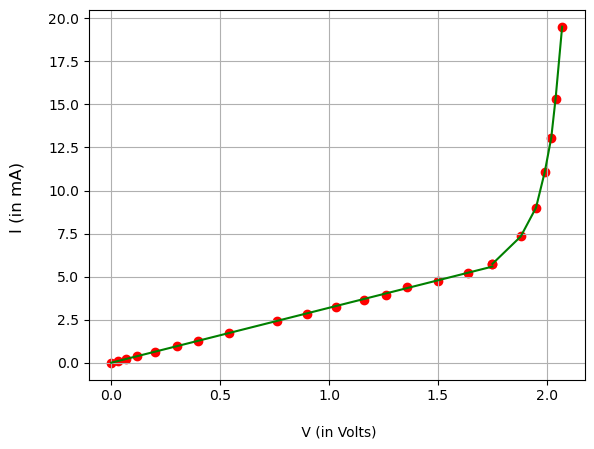

Equation of the graph when LED is off is, 
 
 I_0 =


3.19006390815326*V_F

"\nVF, I = smp.symbols('V_F I', real=True, positive=True)\nI = ap*smp.exp(bp*VF)\nprint('\n Equation of the graph when LED is on is, \n \n I =')\ndisplay(I)\n"

In [9]:
def model_f0(x, c):
    return c*x
popt, pcov = curve_fit(model_f0, x_data0, y_data0, p0=[3.5])
cp = popt[0]
x_model0 = np.linspace(min(x_data0), max(x_data0), 100)
y_model0 = model_f0(x_model0, cp)
plt.scatter(x_data0, y_data0, color='r')
plt.scatter(x_data, y_data, color='r')
plt.plot(x_model0, y_model0, color='g')
plt.plot(x_data, y_data, color='g')
#
'''
def model_f(x, a, b):
    return a*np.exp(b*(x))
popt, pcov = curve_fit(model_f, x_data, y_data, p0=[6,1])
ap, bp = popt
x_model = np.linspace(min(x_data), max(x_data), 100)
y_model = model_f(x_model, ap, bp)
plt.scatter(x_data,y_data)
plt.plot(x_model,y_model, color='r')
'''
plt.xlabel('\n V (in Volts)')
plt.ylabel('I (in mA) \n', fontsize=12)
plt.grid()
plt.show()

VF, I0 = smp.symbols('V_F I_0', real=True, positive=True)
I0 = cp*VF
print('Equation of the graph when LED is off is, \n \n I_0 =')
display(I0)
#
'''
VF, I = smp.symbols('V_F I', real=True, positive=True)
I = ap*smp.exp(bp*VF)
print('\n Equation of the graph when LED is on is, \n \n I =')
display(I)
'''

## V-I Characteristics of Zener Diode

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import curve_fit
import sympy as smp
from sympy import *

**Experiment 1 (06/04/2023):** 

*Forward Bias data:*

In [11]:
x_data1 = np.array([0.  , 0.35, 0.4 , 0.66, 0.69, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82]) 
y_data1 = np.array([ 0. ,  0. ,  0. ,  0.1,  0.3,  0.6,  0.9,  1.5,  2. ,  2.5,  3.9,
        5.5,  8.6, 11.6, 16.3, 26.6, 38.6])

*Reverse Bias data:*

*Reverse Bias data (modified):*

In [12]:
x_data2 = np.array([-0.  , -2.47, -3.01, -3.49, -3.63, -4.08, -5.04, -5.37, -5.57,
       -5.6 , -5.61, -5.62, -5.63, -5.64, -5.66, -5.68, -5.7 , -5.72,
       -5.75, -5.78, -5.79, -5.8 , -5.83, -5.85, -5.89, -5.96, -6.  ])
y_data2 = np.array([ -0. ,  -0. ,  -0. ,  -0. ,  -0. ,  -0. ,  -0. ,  -0. ,  -0.1,
        -2.1,  -4.6,  -7.4,  -9.1, -10.4, -13.9, -19. , -25.5, -28.6,
       -32. , -40.3, -44.1, -47.3, -53.7, -62. , -72. , -82.8, -90. ])

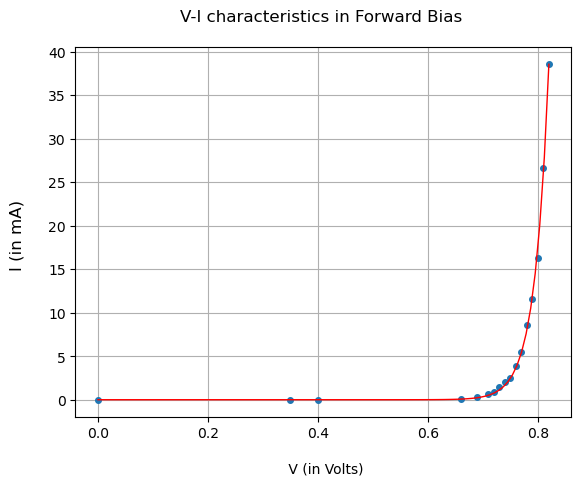


 Equation of the current (in forward bias) is, 
 
 I =

3.90414672793023e-13*exp(39.2965588702789*V_F)

In [13]:
def f1(x, a, b):
    return a*np.exp(b*x)

popt1, pcov1 = curve_fit(f1, x_data1, y_data1, p0=[0.01,1])
ap, bp = popt1
x1 = np.linspace(min(x_data1), max(x_data1), 100)
y1 = f1(x1, ap, bp)

plt.plot(x_data1,y_data1, 'o', ms=4)
plt.plot(x1,y1, color='r', lw=1)
plt.title('V-I characteristics in Forward Bias \n')
plt.xlabel('\n V (in Volts)')
plt.ylabel('I (in mA) \n', fontsize=12)
plt.grid()
plt.savefig('v-i characteristics of zener diode in forward bias', dpi=200)
plt.show()

VF, I = smp.symbols('V_F I', real=True)
I = ap*smp.exp(bp*VF)
print('\n Equation of the current (in forward bias) is, \n \n I =', end='')
display(I)

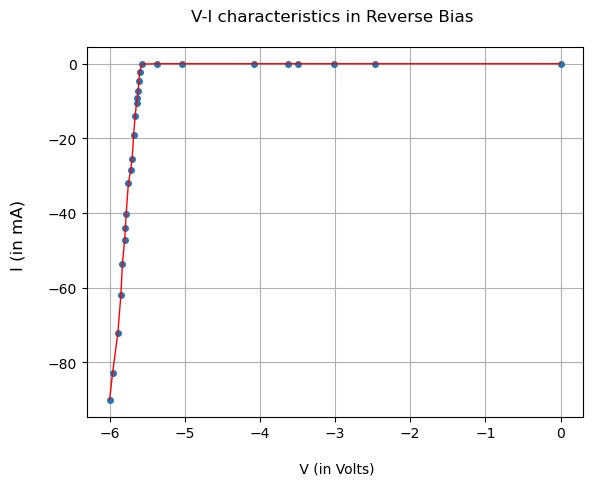

In [14]:
plt.plot(x_data2,y_data2, 'o', ms=4)
plt.plot(x_data2,y_data2, color='r', lw=1)
plt.title('V-I characteristics in Reverse Bias \n')
plt.xlabel('\n V (in Volts)')
plt.ylabel('I (in mA) \n', fontsize=12)
plt.grid()
plt.savefig('v-i characteristics of zener diode in reverse bias', dpi=200)
plt.show()

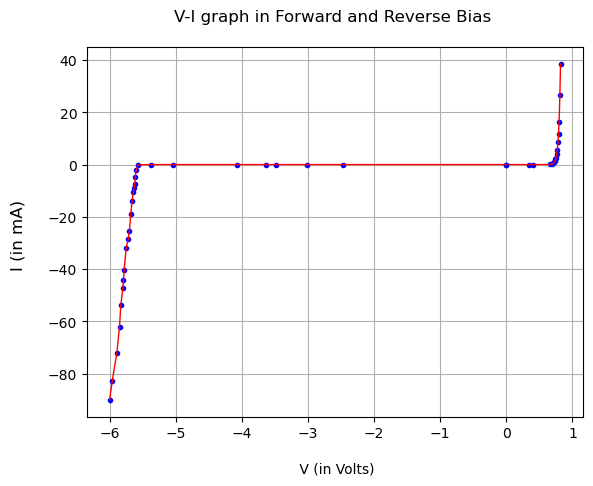


 Equation of the current is, 
 
 I =

3.90414672793023e-13*exp(39.2965588702789*V_F)

Reverse Saturation current is 3.904146727930226e-13 mA.


In [15]:
def f1(x, a, b):
    return a*np.exp(b*x)

popt1, pcov1 = curve_fit(f1, x_data1, y_data1, p0=[0.01,1])
ap, bp = popt1
x1 = np.linspace(min(x_data1), max(x_data1), 100)
y1 = f1(x1, ap, bp)

plt.plot(x_data1,y_data1, 'o', color='blue', ms=3)
plt.plot(x1,y1, color='r', lw=1)
plt.plot(x_data2,y_data2, 'o', color='blue', ms=3)
plt.plot(x_data2,y_data2, color='r', lw=1)
plt.title('V-I graph in Forward and Reverse Bias \n')
plt.xlabel('\n V (in Volts)')
plt.ylabel('I (in mA) \n', fontsize=12)
plt.grid()
plt.savefig('v-i characteristics of zener diode', dpi=200)
plt.show()

VF, I = smp.symbols('V_F I', real=True)
I = ap*smp.exp(bp*VF)
print('\n Equation of the current is, \n \n I =', end='')
display(I)
print('Reverse Saturation current is', ap, 'mA.')

## Operation Amplifier

### Inverting Amplifier (15.05.23)

In [16]:
Vmin, Vmax = -12, 12
Rs1, Rf1 = 975, 32.2e3
x_data1 = np.array([-0.3 , -0.2 , -0.15, -0.07,  0.07,  0.15,  0.2 ,  0.3 ])
# input voltage Vin
y_data1 = np.array([ 9.42,  7.08,  4.71,  2.28, -2.66, -5.09, -7.48, -9.84])
# output voltage Vout

Rs2, Rf2 = 975, 9.74e3
x_data2 = np.array([-0.3 , -0.2 , -0.15, -0.07,  0.07,  0.15,  0.2 ,  0.3 ])
# input voltage Vin
y_data2 = np.array([ 2.85,  2.14,  1.42,  0.69, -0.8 , -1.53, -2.26, -2.97])
# output voltage Vout

Rs3, Rf3 = 975, 3.295e3
x_data3 = np.array([-0.3 , -0.2 , -0.15, -0.07,  0.07,  0.15,  0.2 ,  0.3 ])
# input voltage Vin
y_data3 = np.array([ 0.95,  0.71,  0.48,  0.22, -0.27, -0.51, -0.75, -0.99])
# output voltage Vout

Calculated value of gain for (Rs,Rf) = (975, 32200.0) is 33.02564102564103
Experimental value of gain for (Rs,Rf) = (975, 32200.0) is 33.372935194255426
Calculated value of gain for (Rs,Rf) = (975, 9740.0) is 9.98974358974359
Experimental value of gain for (Rs,Rf) = (975, 9740.0) is 10.078780179019743
Calculated value of gain for (Rs,Rf) = (975, 3295.0) is 3.3794871794871795
Experimental value of gain for (Rs,Rf) = (975, 3295.0) is 3.3570520962985775


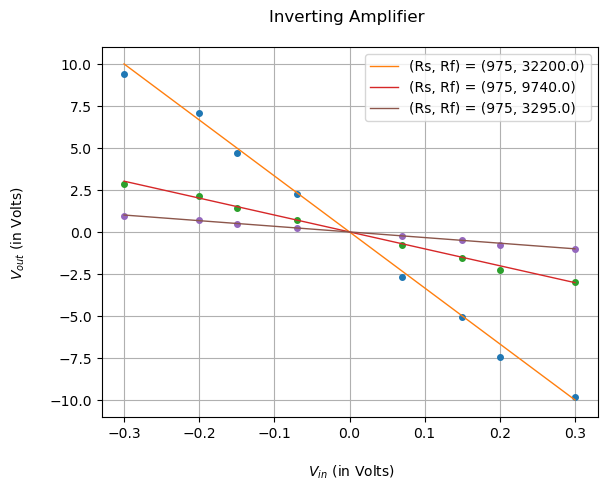

In [17]:
def f1(x, a):
    return a*x

popt1, pcov1 = curve_fit(f1, x_data1, y_data1, p0=33)
ap = popt1
x1 = np.linspace(min(x_data1), max(x_data1), 100)
y1 = f1(x1, ap)
plt.plot(x_data1, y_data1, 'o', ms=4)
plt.plot(x1, y1, lw=1, label=f'(Rs, Rf) = {(Rs1, Rf1)}')
A1calc = Rf1/Rs1
A1expt = abs(ap[0])
print('Calculated value of gain for (Rs,Rf) =', (Rs1, Rf1), 'is', A1calc)
print('Experimental value of gain for (Rs,Rf) =', (Rs1, Rf1), 'is', A1expt)

popt1, pcov1 = curve_fit(f1, x_data2, y_data2, p0=10)
ap = popt1
x1 = np.linspace(min(x_data2), max(x_data2), 100)
y1 = f1(x1, ap)
plt.plot(x_data2, y_data2, 'o', ms=4)
plt.plot(x1, y1, lw=1, label=f'(Rs, Rf) = {(Rs2, Rf2)}')
A2calc = Rf2/Rs2
A2expt = abs(ap[0])
print('Calculated value of gain for (Rs,Rf) =', (Rs2, Rf2), 'is', A2calc)
print('Experimental value of gain for (Rs,Rf) =', (Rs2, Rf2), 'is', A2expt)

popt1, pcov1 = curve_fit(f1, x_data3, y_data3, p0=3.3)
ap = popt1
x1 = np.linspace(min(x_data3), max(x_data3), 100)
y1 = f1(x1, ap)
plt.plot(x_data3, y_data3, 'o', ms=4)
plt.plot(x1, y1, lw=1, label=f'(Rs, Rf) = {(Rs3, Rf3)}')
A3calc = Rf3/Rs3
A3expt = abs(ap[0])
print(f'Calculated value of gain for (Rs,Rf) = {(Rs3, Rf3)} is {A3calc}')
print(f'Experimental value of gain for (Rs,Rf) = {(Rs3, Rf3)} is {A3expt}')

plt.title('Inverting Amplifier \n')
plt.legend()
plt.xlabel('\n $V_{in}$ (in Volts)')
plt.ylabel('$V_{out}$ (in Volts) \n')
plt.grid()
plt.savefig('voltage gain of inverting amplifier', dpi=200)
plt.show()

### Non - inverting Amplifier

In [18]:
Vmin, Vmax = -12, 12
Rs1, Rf1 = 975, 31.7e3
x_data1 = np.array([-0.3,
-0.2,
-0.15,
-0.07,
0.07,
0.15,
0.2,
0.3])   # input voltage Vin
y_data1 = np.array([-10.22,
-7.64,
-5.08,
-2.52,
2.62,
5.2,
7.77,
10.35])  # output voltage Vout

Rs2, Rf2 = 975, 9.74e3
x_data2 = np.array([-0.3,
-0.2,
-0.15,
-0.07,
0.07,
0.15,
0.2,
0.3])   # input voltage Vin
y_data2 = np.array([-3.3,
-2.47,
-1.65,
-0.82,
0.84,
1.68,
2.52,
3.36])  # output voltage Vout

Rs3, Rf3 = 975, 3.3e3
x_data3 = np.array([-0.3,
-0.2,
-0.15,
-0.07,
0.07,
0.15,
0.2,
0.3])   # input voltage Vin
y_data3 = np.array([-1.3,
-0.97,
-0.65,
-0.32,
0.33,
0.66,
0.99,
1.33])  # output voltage Vout

Calculated value of gain for (Rs,Rf) = (975, 31700.0) is 33.51282051282051
Experimental value of gain for (Rs,Rf) = (975, 31700.0) is 35.43456163520475
Calculated value of gain for (Rs,Rf) = (975, 9740.0) is 10.98974358974359
Experimental value of gain for (Rs,Rf) = (975, 9740.0) is 11.472998733879972
Calculated value of gain for (Rs,Rf) = (975, 3300.0) is 4.384615384615385
Experimental value of gain for (Rs,Rf) = (975, 3300.0) is 4.5203303690479695


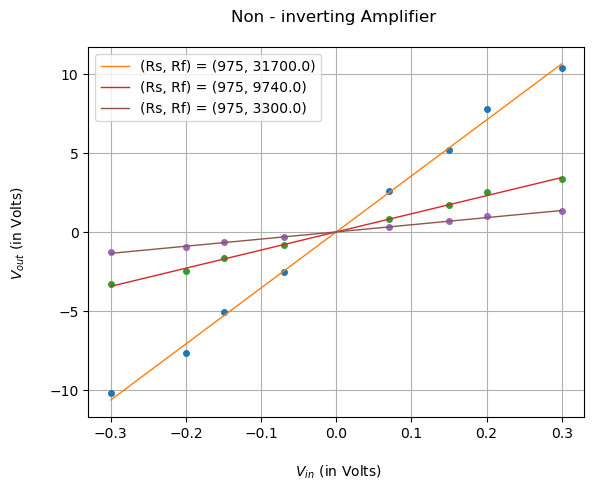

In [19]:
def f1(x, a):
    return a*x

popt1, pcov1 = curve_fit(f1, x_data1, y_data1, p0=33)
ap = popt1
x1 = np.linspace(min(x_data1), max(x_data1), 100)
y1 = f1(x1, ap)
plt.plot(x_data1, y_data1, 'o', ms=4)
plt.plot(x1, y1, lw=1, label=f'(Rs, Rf) = {(Rs1, Rf1)}')
A1calc = 1 + Rf1/Rs1
A1expt = abs(ap[0])
print('Calculated value of gain for (Rs,Rf) =', (Rs1, Rf1), 'is', A1calc)
print('Experimental value of gain for (Rs,Rf) =', (Rs1, Rf1), 'is', A1expt)

popt1, pcov1 = curve_fit(f1, x_data2, y_data2, p0=10.9)
ap = popt1
x1 = np.linspace(min(x_data2), max(x_data2), 100)
y1 = f1(x1, ap)
plt.plot(x_data2, y_data2, 'o', ms=4)
plt.plot(x1, y1, lw=1, label=f'(Rs, Rf) = {(Rs2, Rf2)}')
A2calc = 1 + Rf2/Rs2
A2expt = abs(ap[0])
print('Calculated value of gain for (Rs,Rf) =', (Rs2, Rf2), 'is', A2calc)
print('Experimental value of gain for (Rs,Rf) =', (Rs2, Rf2), 'is', A2expt)

popt1, pcov1 = curve_fit(f1, x_data3, y_data3, p0=4.3)
ap = popt1
x1 = np.linspace(min(x_data3), max(x_data3), 100)
y1 = f1(x1, ap)
plt.plot(x_data3, y_data3, 'o', ms=4)
plt.plot(x1, y1, lw=1, label=f'(Rs, Rf) = {(Rs3, Rf3)}')
A3calc = 1 + Rf3/Rs3
A3expt = abs(ap[0])
print('Calculated value of gain for (Rs,Rf) =', (Rs3, Rf3), 'is', A3calc)
print('Experimental value of gain for (Rs,Rf) =', (Rs3, Rf3), 'is', A3expt)

plt.title('Non - inverting Amplifier \n')
plt.legend()
plt.xlabel('\n $V_{in}$ (in Volts)')
plt.ylabel('$V_{out}$ (in Volts) \n')
plt.grid()
plt.savefig('voltage gain of non-inverting amplifier', dpi=200)
plt.show()

### Differential Amplifier

In [20]:
R1 = np.array([969, 975])
R1avg = R1.mean()
R2 = np.array([9.83e3, 9.83e3])
R2avg = R2.mean()

V1 = np.array([-0.3 , -0.2 , -0.15, -0.07,  0.07,  0.15,  0.2 ,  0.3 , -0.3 ,
       -0.2 , -0.15, -0.07,  0.07,  0.15,  0.2 ,  0.3 , -0.3 , -0.2 ,
       -0.15, -0.07,  0.07,  0.15,  0.2 ,  0.3 , -0.3 , -0.2 , -0.15,
       -0.07,  0.07,  0.15,  0.2 ,  0.3 ])
V2 = np.array([ 0.07,  0.07,  0.07,  0.07, -0.07, -0.07, -0.07, -0.07,  0.15,
        0.15,  0.15,  0.15, -0.15, -0.15, -0.15, -0.15,  0.2 ,  0.2 ,
        0.2 ,  0.2 , -0.2 , -0.2 , -0.2 , -0.2 ,  0.3 ,  0.3 ,  0.3 ,
        0.3 , -0.3 , -0.3 , -0.3 , -0.3 ])
x_data = abs(V1 - V2)  # input voltage Vin

y_data = np.array([ 3.78,  3.03,  2.28,  1.53,  1.48,  2.24,  3.  ,  3.75,  4.49,
        3.75,  3.  ,  2.27,  2.22,  2.96,  3.72,  4.46, -5.19, -4.46,
       -3.72, -2.99,  2.94,  3.67,  4.42,  5.16, -5.89, -5.15, -4.42,
       -3.69,  3.64,  4.38,  5.12,  5.85])  # output voltage Vout
y_data = abs(y_data)

Calculated value of gain is 10.113168724279836
Experimental value of gain is 10.238131532482392


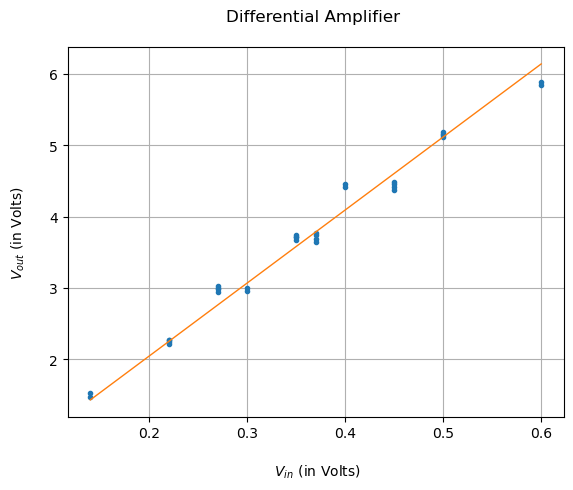

In [21]:
popt1, pcov1 = curve_fit(f1, x_data, y_data, p0=11)
ap = popt1
x1 = np.linspace(min(x_data), max(x_data), 100)
y1 = f1(x1, ap)
plt.plot(x_data, y_data, 'o', ms=3)
plt.plot(x1, y1, lw=1)
Acalc = R2avg/R1avg
Aexpt = abs(ap[0])
print('Calculated value of gain is', Acalc)
print('Experimental value of gain is', Aexpt)

plt.title('Differential Amplifier \n')
plt.xlabel('\n $V_{in}$ (in Volts)')
plt.ylabel('$V_{out}$ (in Volts) \n')
plt.grid()
plt.savefig('voltage gain of differential amplifier', dpi=200)
plt.show()

## BJT - Common Emitter (CE) mode

### Expt. (13.07.2023)

Input Characteristics

In [22]:
data1 = pd.read_excel("CC 10 Practicals data.xlsx", sheet_name='4.1')
display(data1.head())

,V_CE,V_BE,I_B
0,2,0.00,0.0
1,2,0.10,0.0
2,2,0.15,0.1
3,2,0.30,0.2
4,2,0.42,0.4


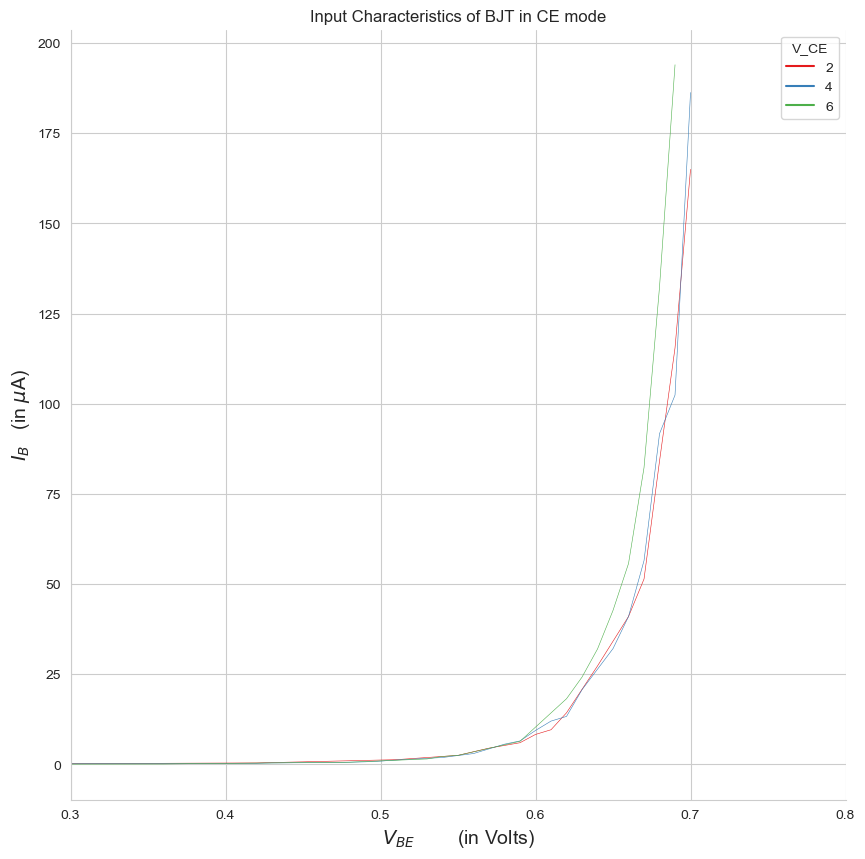

In [23]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
sns.lineplot(x='V_BE', y='I_B', hue='V_CE', data=data1, palette='Set1', linewidth=0.4)
# sns.scatterplot(x='V_BE', y='I_B', hue='V_CE', style='V_CE', data=data1, palette='Set1')
sns.despine()
plt.title('Input Characteristics of BJT in CE mode')
plt.xlabel('$V_{BE}$\t(in Volts)', fontsize=14)
plt.ylabel('$I_B$\t(in $\mu$A)', fontsize=14)
plt.xlim(0.3, 0.8)
plt.show()

Output Characteristics

In [24]:
data2 = pd.read_excel("CC 10 Practicals data.xlsx", sheet_name='4.2')
display(data2.head())

,I_B,V_CE,I_C
0,10,-0.25,-0.04
1,10,-0.10,-0.40
2,10,0.09,0.63
3,10,0.29,1.89
4,10,0.60,1.89


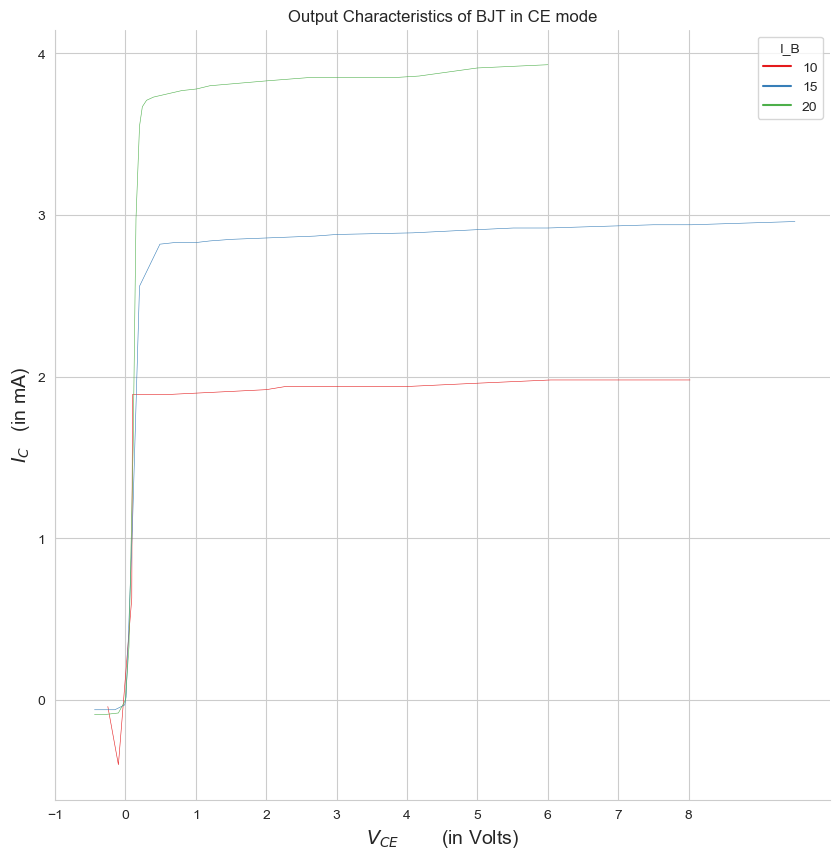

In [25]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
sns.lineplot(x='V_CE', y='I_C', data=data2, hue='I_B', palette='Set1', linewidth=0.4)
# sns.scatterplot(x='V_CE', y='I_C', hue='I_B', data=data2, style='I_B', palette='Set1')
sns.despine()
plt.title('Output Characteristics of BJT in CE mode')
plt.xlabel('$V_{CE}$\t(in Volts)', fontsize=14)
plt.ylabel('$I_C$\t(in mA)', fontsize=14)
# plt.xlim(-0.5,1)
plt.xticks(np.arange(-1, 9))
plt.show()

### Expt. (29.08.2023)

Input Characteristics

In [26]:
data1 = pd.read_excel("CC 10 Practicals data.xlsx", sheet_name='4.5')
display(data1.head())

,V_CE,V_BE,I_B
0,2,0.00,0.0
1,2,0.10,0.1
2,2,0.16,0.2
3,2,0.25,0.3
4,2,0.30,0.5


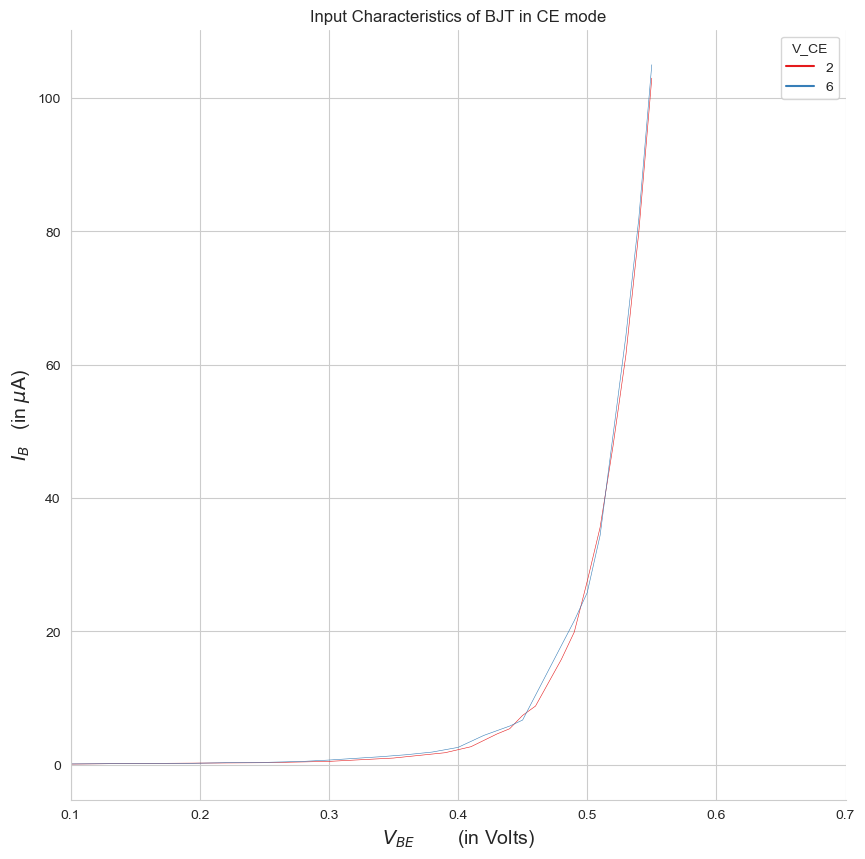

In [27]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
sns.lineplot(x='V_BE', y='I_B', hue='V_CE', data=data1, palette='Set1', linewidth=0.4)
# sns.scatterplot(x='V_BE', y='I_B', hue='V_CE', style='V_CE', data=data1, palette='Set1')
sns.despine()
plt.title('Input Characteristics of BJT in CE mode')
plt.xlabel('$V_{BE}$\t(in Volts)', fontsize=14)
plt.ylabel('$I_B$\t(in $\mu$A)', fontsize=14)
plt.xlim(0.1, 0.7)
plt.show()

Output Characteristics

In [28]:
data2 = pd.read_excel("CC 10 Practicals data.xlsx", sheet_name='4.6')
display(data2.head())

,I_B,V_CE,I_C
0,15,0.00,0.00
1,15,0.01,0.01
2,15,0.03,0.03
3,15,0.08,0.04
4,15,0.11,0.05


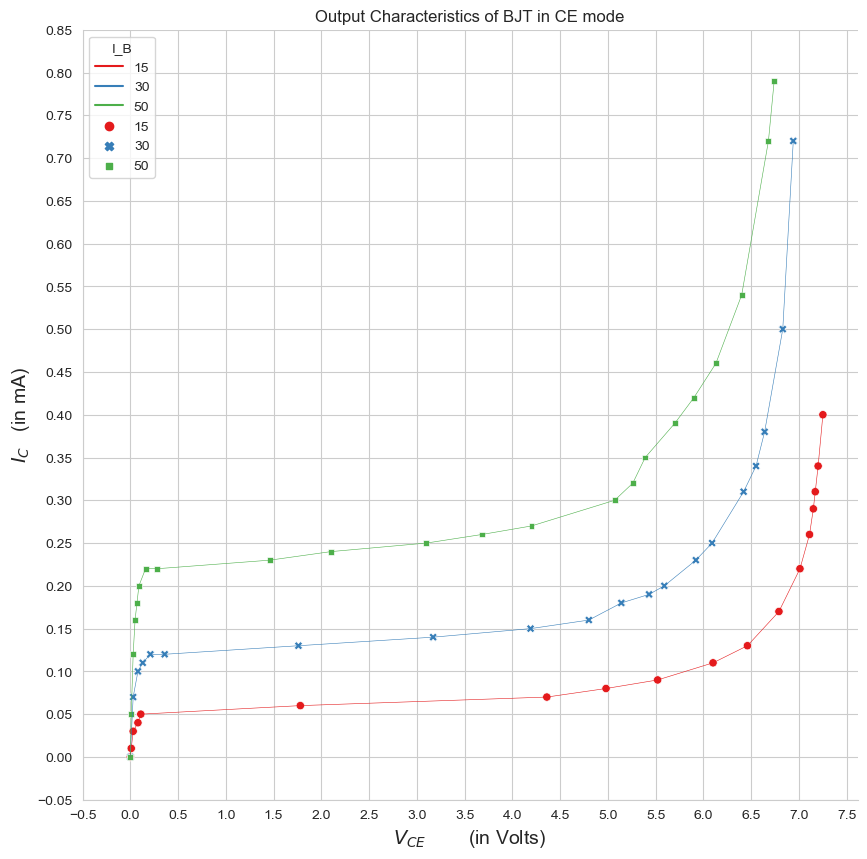

In [29]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
sns.lineplot(x='V_CE', y='I_C', data=data2, hue='I_B', palette='Set1', linewidth=0.4)
sns.scatterplot(x='V_CE', y='I_C', hue='I_B', data=data2, style='I_B', palette='Set1')
sns.despine()
plt.title('Output Characteristics of BJT in CE mode')
plt.xlabel('$V_{CE}$\t(in Volts)', fontsize=14)
plt.ylabel('$I_C$\t(in mA)', fontsize=14)
# plt.xlim(-0.5,1)
plt.xticks(np.arange(-0.5, 8, 0.5))
plt.yticks(np.arange(-0.05, 0.9, 0.05))
plt.savefig('output characteristics of bjt in ce mode', dpi=200)
plt.show()

Transfer Characteristics

In [30]:
data2 = pd.read_excel("CC 10 Practicals data.xlsx", sheet_name='4.7')
display(data2.head())

,V_CE,I_B,I_C
0,2,0.0,0.00
1,2,2.6,0.01
2,2,8.4,0.03
3,2,10.3,0.04
4,2,18.4,0.07


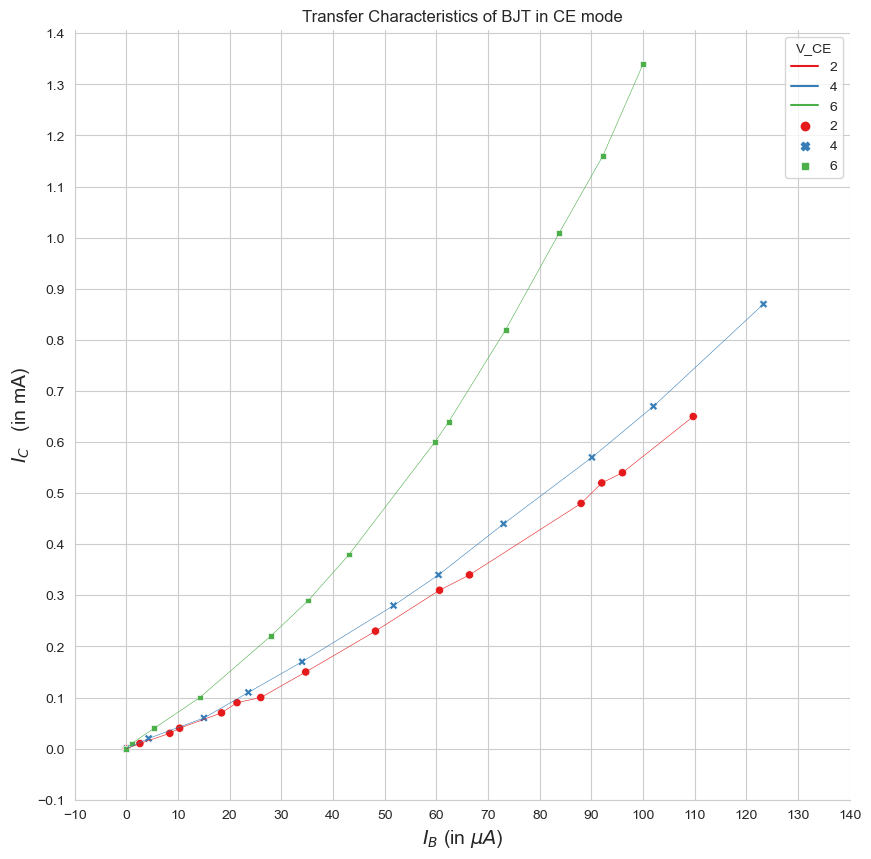

In [31]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
sns.lineplot(x='I_B', y='I_C', data=data2, hue='V_CE', palette='Set1', linewidth=0.4)
sns.scatterplot(x='I_B', y='I_C', hue='V_CE', data=data2, style='V_CE', palette='Set1')
sns.despine()
plt.title('Transfer Characteristics of BJT in CE mode')
plt.xlabel('$I_{B}$\t(in $\mu A$)', fontsize=14)
plt.ylabel('$I_C$\t(in mA)', fontsize=14)
plt.xticks(np.arange(-10, 150, 10))
plt.yticks(np.arange(-0.1, 1.5, 0.1))
plt.savefig('transfer characteristics of bjt in ce mode', dpi=200)
plt.show()

### Expt. (14.09.2023)

In [32]:
data2 = pd.read_excel("CC 10 Practicals data.xlsx", sheet_name='4.8')
display(data2.head())

,I_B,V_CE,I_C
0,30,0.00,0.00
1,30,0.03,0.07
2,30,0.08,0.10
3,30,0.13,0.11
4,30,0.21,0.12


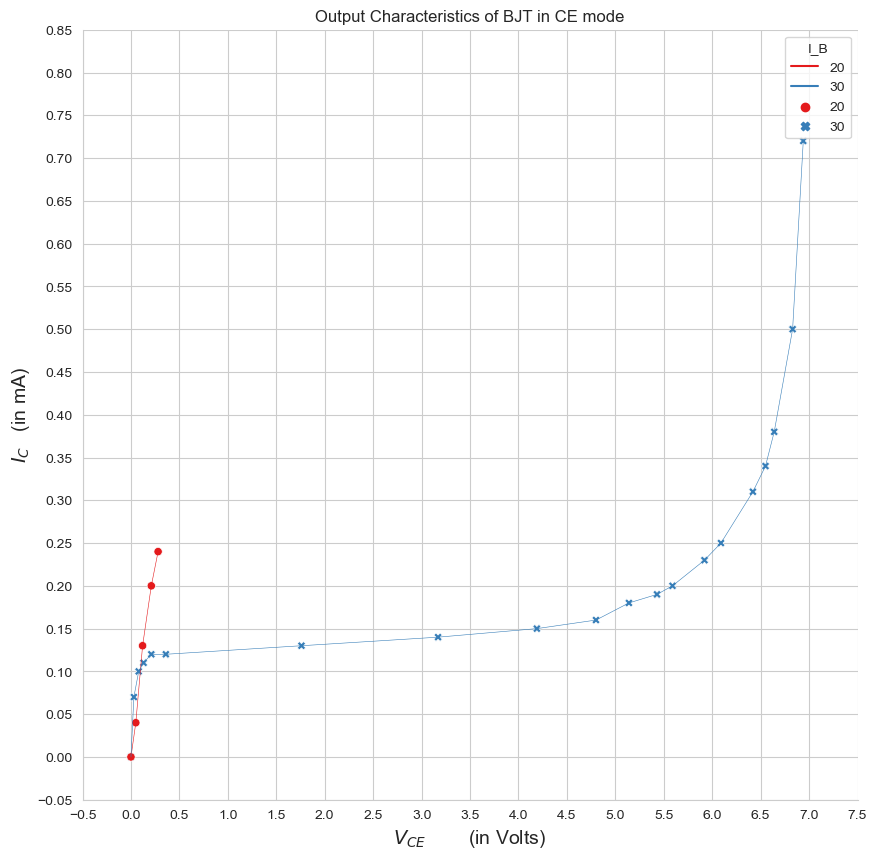

In [33]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
sns.lineplot(x='V_CE', y='I_C', data=data2, hue='I_B', palette='Set1', linewidth=0.4)
sns.scatterplot(x='V_CE', y='I_C', hue='I_B', data=data2, style='I_B', palette='Set1')
sns.despine()
plt.title('Output Characteristics of BJT in CE mode')
plt.xlabel('$V_{CE}$\t(in Volts)', fontsize=14)
plt.ylabel('$I_C$\t(in mA)', fontsize=14)
# plt.xlim(-0.5,1)
plt.xticks(np.arange(-0.5, 8, 0.5))
plt.yticks(np.arange(-0.05, 0.9, 0.05))
# plt.savefig('output characteristics of bjt in ce mode', dpi=100)
plt.show()

### Expt. (20.09.2023)

Output Characteristics

In [34]:
data2 = pd.read_excel("CC 10 Practicals data.xlsx", sheet_name='4.11')
display(data2.head())

,I_B,V_CE,I_C
0,20,0.00,0.00
1,20,0.01,0.03
2,20,0.04,0.15
3,20,0.07,0.49
4,20,0.14,1.82


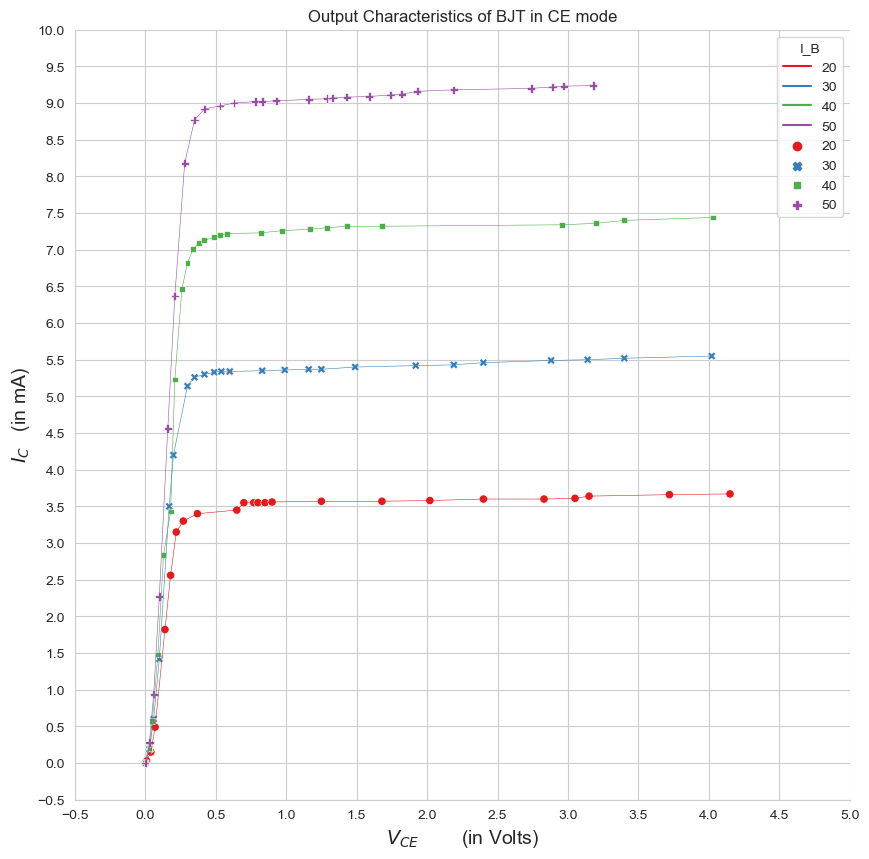

In [35]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
sns.lineplot(x='V_CE', y='I_C', data=data2, hue='I_B', palette='Set1', linewidth=0.4)
sns.scatterplot(x='V_CE', y='I_C', hue='I_B', data=data2, style='I_B', palette='Set1')
sns.despine()
plt.title('Output Characteristics of BJT in CE mode')
plt.xlabel('$V_{CE}$\t(in Volts)', fontsize=14)
plt.ylabel('$I_C$\t(in mA)', fontsize=14)
# plt.xlim(-0.5,1)
plt.xticks(np.arange(-0.5, 5.5, 0.5))
plt.yticks(np.arange(-0.5, 10.5, 0.5))
plt.savefig('output characteristics of bjt in ce mode exam', dpi=200)
plt.show()

Transfer Characteristics

In [36]:
data2 = pd.read_excel("CC 10 Practicals data.xlsx", sheet_name='4.12')
display(data2.head())

,V_CE,I_B,I_C
0,2,0.0,0.00
1,2,0.5,0.09
2,2,1.3,0.22
3,2,4.4,0.78
4,2,9.6,1.72


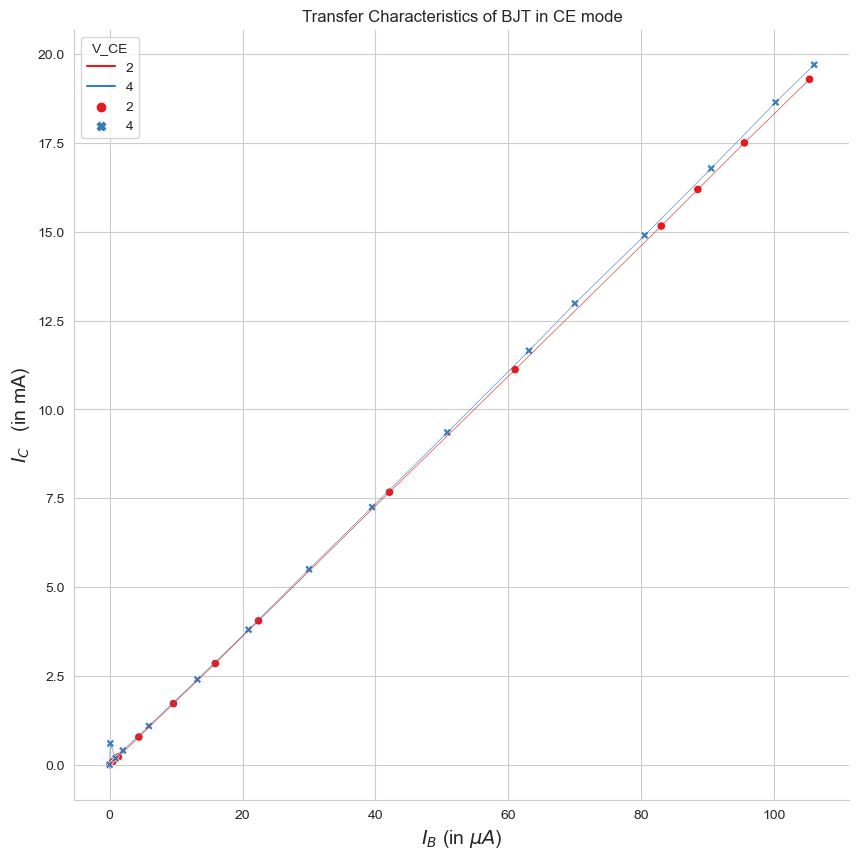

In [37]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
sns.lineplot(x='I_B', y='I_C', data=data2, hue='V_CE', palette='Set1', linewidth=0.4)
sns.scatterplot(x='I_B', y='I_C', hue='V_CE', data=data2, style='V_CE', palette='Set1')
sns.despine()
plt.title('Transfer Characteristics of BJT in CE mode')
plt.xlabel('$I_{B}$\t(in $\mu A$)', fontsize=14)
plt.ylabel('$I_C$\t(in mA)', fontsize=14)
# plt.savefig('transfer characteristics of bjt in ce mode', dpi=100)
plt.show()